In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
PATH = "../../Datasets/"
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [3]:
dfDay = pd.read_csv(PATH + "Day.csv")
dfDay["Time"] = pd.to_datetime(dfDay["Time"])

In [4]:
dfDay.shape

(3453, 24)

In [5]:
dfDay[["Time", "PM2.5", "PM2.5_flag"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        3453 non-null   datetime64[ns]
 1   PM2.5       1284 non-null   float64       
 2   PM2.5_flag  3368 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 81.1+ KB


In [6]:
dfDay[["Time", "PM2.5", "PM2.5_flag"]].describe()

,Time,PM2.5
count,3453,1284.000000
mean,2020-04-23 03:36:26.272806400,14.170789
min,2015-08-01 00:00:00,-1139.584226
25%,2017-12-11 00:00:00,9.815000
50%,2020-04-22 00:00:00,14.164580
75%,2022-09-02 00:00:00,21.031064
max,2025-01-27 00:00:00,80.472833
std,NaN,38.637073


In [7]:
def clean(x):
    if x >= 4 and x <= 400: return x
    return np.nan

In [8]:
dfDay["PM2.5"] = dfDay["PM2.5"].apply(clean)

In [9]:
dfDay["PM2.5"].describe()

count    1225.000000
mean       16.737019
std         9.149690
min         4.006514
25%        10.425316
50%        14.669229
75%        21.273229
max        80.472833
Name: PM2.5, dtype: float64

In [10]:
dfDay.loc[dfDay["PM2.5_flag"] != "OK", "PM2.5"] = np.nan

In [11]:
dfDay[dfDay["PM2.5_flag"] != "OK"]["PM2.5"].info()

<class 'pandas.core.series.Series'>
Index: 2222 entries, 0 to 3438
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 34.7 KB


In [12]:
dfDay["PM2.5"].describe()

count    1216.000000
mean       16.740713
std         9.027413
min         4.006514
25%        10.457157
50%        14.709785
75%        21.275314
max        80.472833
Name: PM2.5, dtype: float64

In [13]:
dfDay["PM2.5"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3453 entries, 0 to 3452
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
1216 non-null   float64
dtypes: float64(1)
memory usage: 27.1 KB


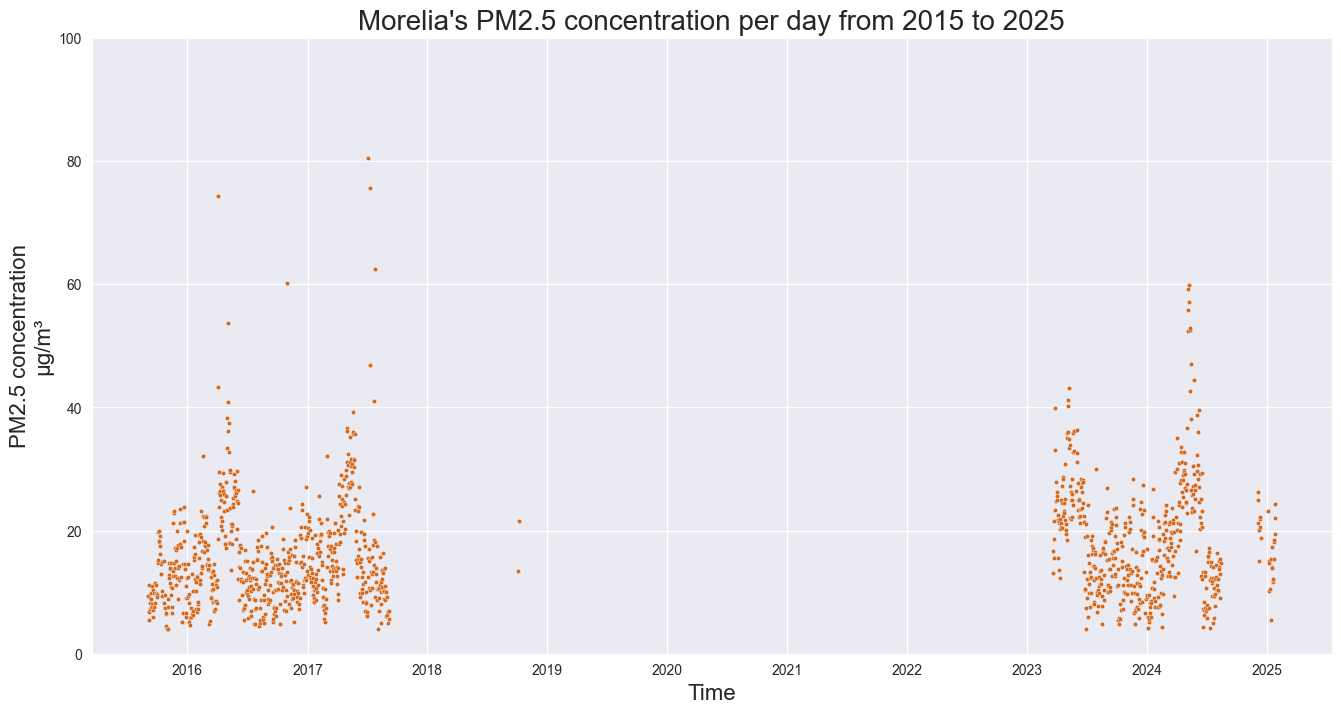

In [14]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["PM2.5"], s=10, color="chocolate")
plt.ylim(0, 100)
plt.ylabel("PM2.5 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM2.5 concentration per day from 2015 to 2025", size=20)
plt.show()

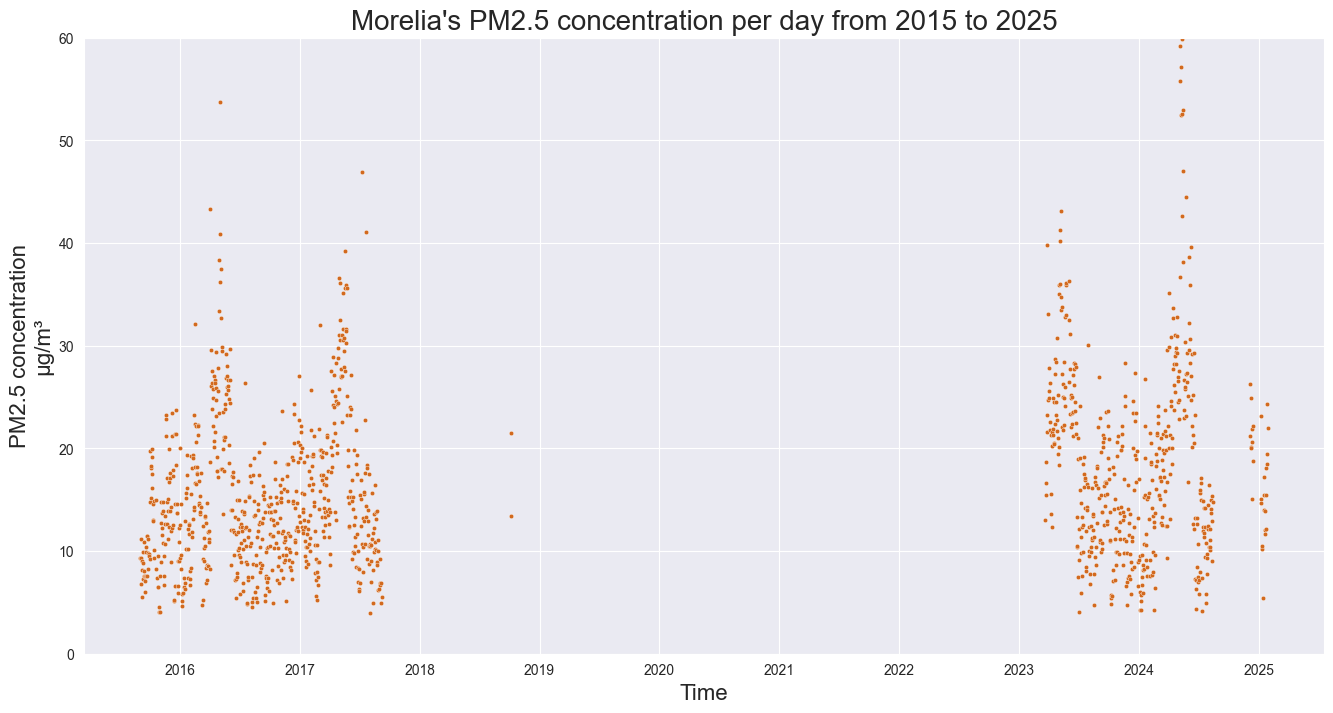

In [15]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x=dfDay["Time"], y=dfDay["PM2.5"], s=10, color="chocolate")
plt.ylim(0, 60)
plt.ylabel("PM2.5 concentration\nμg/m³", size=16)
plt.xlabel("Time", size=16)
plt.title("Morelia's PM2.5 concentration per day from 2015 to 2025", size=20)
plt.show()